In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import psycopg2
from IPython.display import display

%matplotlib inline

In [6]:
dbinfo = {
    'host' : 'flowers.mines.edu',
    'user' : 'dkern',
    'password' : 'SometimesIEatBananas',
    'database' : 'csci403'
}

try:
    db = psycopg2.connect(**dbinfo)
    cursor = db.cursor()
except psycopg2.Error as e:
    print(e)

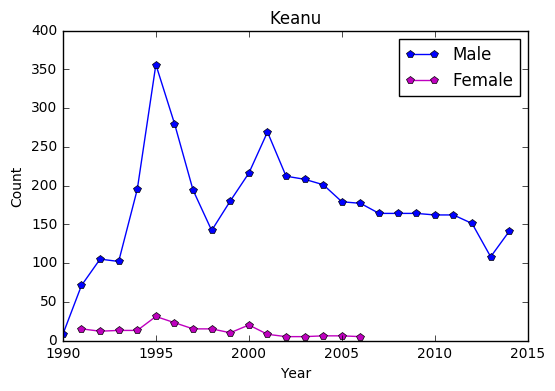

In [26]:
keanuMquery = """SELECT year, count FROM babynames WHERE name LIKE 'Keanu' AND gender = 'M'"""
keanuFquery = """SELECT year, count FROM babynames WHERE name LIKE 'Keanu' AND gender = 'F'"""
cursor.execute(keanuMquery)
keanuMCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])
cursor.execute(keanuFquery)
keanuFCounts = pd.DataFrame(cursor.fetchall(), columns=[r[0] for r in cursor.description])
#display(keanuCounts)
plt.plot(keanuMCounts["year"], keanuMCounts["count"], "bp-", label="Male")
plt.plot(keanuFCounts["year"], keanuFCounts["count"], "mp-", label="Female")
plt.title("Keanu")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [5]:
cursor.close()
db.close()